In [1]:
import pandas as pd
import numpy as np
import math
from scipy.spatial import distance
import random
from numpy.random import permutation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

In [2]:
warnings.filterwarnings('ignore')
os.chdir('C:/Users/tmutengwa/Documents/Acadgild/DataSources')

In [3]:
with open('nba_2013.csv', 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [4]:
pandas_profiling.ProfileReport(nba)

Number of variables,31
Number of observations,481
Total Missing (%),0.6%
Total size in memory,116.6 KiB
Average record size in memory,248.3 B
Numeric,16
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,12


In [5]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [6]:
nba = nba.fillna(0)

In [7]:
nba.shape

(481, 31)

In [8]:
nba.columns.values

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [9]:
nba.drop(labels = ['player','pos', 'bref_team_id','season', 'season_end'], axis = 1, inplace = True)

In [10]:
nba.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [11]:
train, test = train_test_split(nba, test_size = 0.3, random_state = 1)

In [12]:
train.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [13]:
y_train = train['pts']
y_test = test['pts']

In [14]:
X_train = train.drop('pts', axis =1)
X_test = test.drop('pts', axis = 1)

In [15]:
print(X_train.shape)
print(y_train.shape)

(336, 25)
(336,)


In [16]:
print(X_test.shape)
print(y_test.shape)

(145, 25)
(145,)


In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
knnR=KNeighborsRegressor()
knn = knnR.fit(X_train, y_train)

In [19]:
#make prediction. It can be done with the help of following script −

y_pred = knn.predict(X_test)

In [20]:
knn.score(X_test, y_test)

0.9556233182576176

In [21]:
RMSE = []
train_score = []
test_score =[]
for K in range(40):
    K = K+1
    knnR = KNeighborsRegressor(n_neighbors = K)

    knn = knnR.fit(X_train, y_train)  #fit the model
    y_pred =knn.predict(X_test) #make prediction on test set
    TRAIN_SCORE = knn.score(X_train, y_train)
    TEST_SCORE = knn.score(X_test, y_test)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    train_score.append(TRAIN_SCORE)
    test_score.append(TEST_SCORE)
    RMSE.append(rmse)
    #print('R sqrd score for k= ',K ,' train_score = ', train_score ,'test_score =' ,test_score, 'rmse =', RMSE)

In [22]:
K = np.linspace(1,40,40)
df1 = pd.DataFrame(data =train_score, columns = ['train_score'], index = K)
df2 = pd.DataFrame(data =test_score, columns = ['test_score'], index = K);df2
df3 = pd.DataFrame(data = RMSE, columns = ['rmse'], index = K)
df = pd.concat([df1,df2,df3], axis =1)

In [23]:
df.sort_values('rmse', ascending = True).head()

,train_score,test_score,rmse
3.0,0.973033,0.965285,96.095993
4.0,0.971707,0.958994,104.440277
2.0,0.979928,0.957761,105.999349
5.0,0.968482,0.955623,108.648046
6.0,0.965436,0.953074,111.725557


In [24]:
df.columns

Index(['train_score', 'test_score', 'rmse'], dtype='object')

In [25]:
df.dtypes

train_score    float64
test_score     float64
rmse           float64
dtype: object

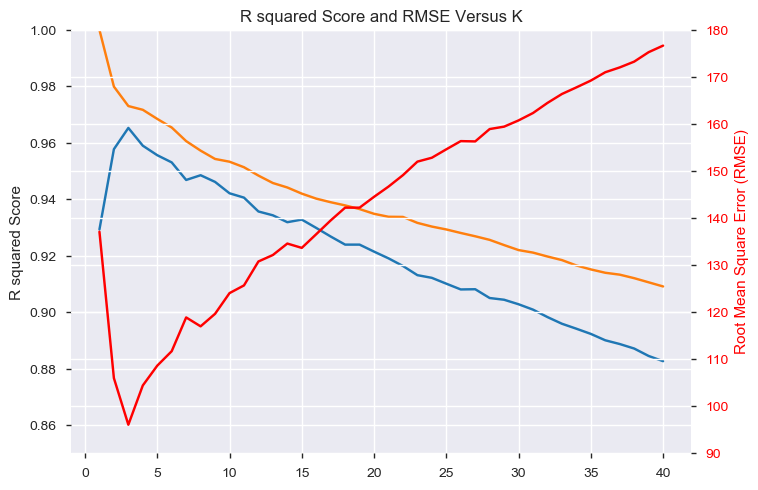

In [26]:
pivot_TrainTest = pd.pivot_table(df, index = df.index, values =['train_score','test_score'])
#pivot_Test = pd.pivot_table(df, index = df.index, values =['test_score'])
pivot_RMSE = pd.pivot_table(df, index = df.index, values =['rmse'])
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(pivot_TrainTest, label= ['train_score','test_score'])
ax.set_title('R squared Score and RMSE Versus K')
ax.set_ylabel('R squared Score')

ax2 = ax.twinx()
ax2.plot(pivot_RMSE, color = 'red', label = 'rmse')
ax2.set_ylabel('Root Mean Square Error (RMSE)', color ='red')
ax2.tick_params(axis='y',labelcolor= 'red')

ax2.set_ylim(90, 180)
ax.set_ylim(0.85,1)

plt.show()

In [27]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 

In [28]:
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 

In [29]:
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

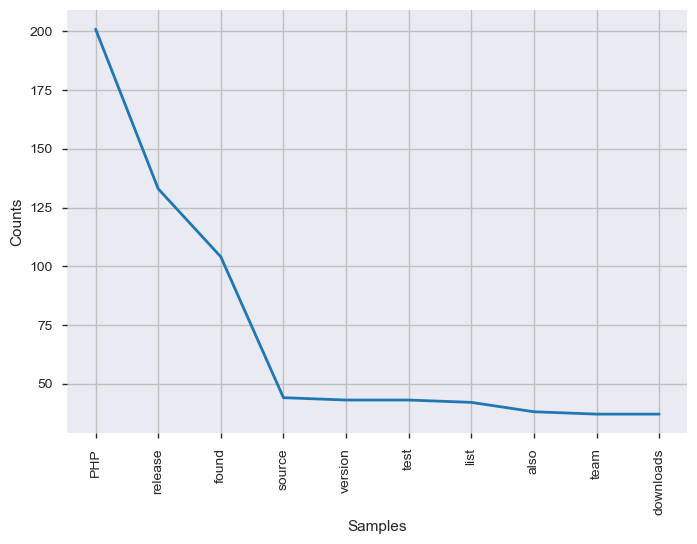

In [30]:
freq.plot(10,cumulative=False)

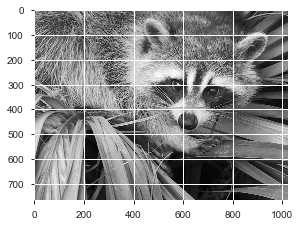

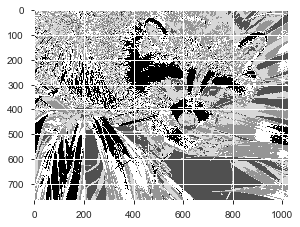

In [31]:
import numpy as np
import scipy
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')

# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.subplot(121)
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

#print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 
 
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.subplot(122)
plt.imshow(image)
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn import preprocessing

In [33]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

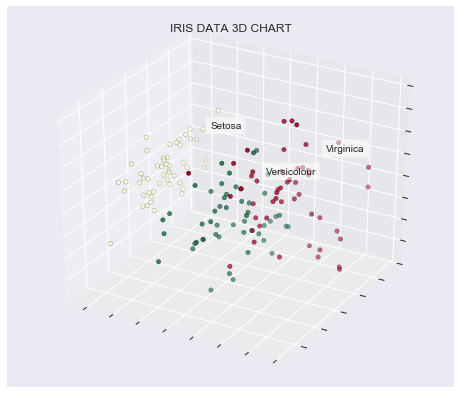

In [34]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 7))
plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = plt.axes(projection='3d')

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlGn,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("IRIS DATA 3D CHART")

plt.show()

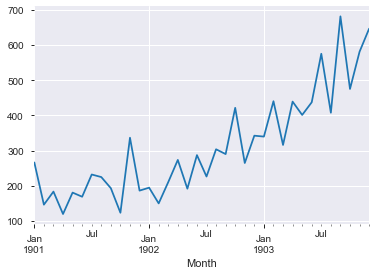

In [37]:
from pandas import read_csv
from datetime import datetime
from matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()
plt.show()

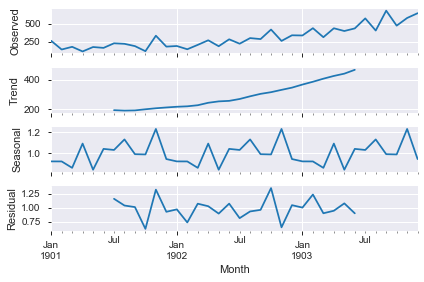

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

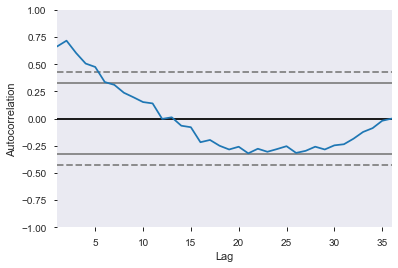

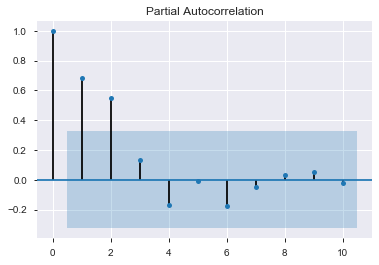

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
autocorrelation_plot(series)
plot_pacf(series, lags=10)
plt.show()

In [38]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\DSMasters\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\DSMasters\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Unnamed: 1   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 15 Nov 2019   AIC                            406.340
Time:                        15:10:21   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Unnamed: 1    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Unnamed: 1  

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 6958.326


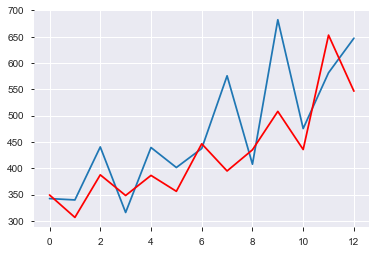

In [48]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()